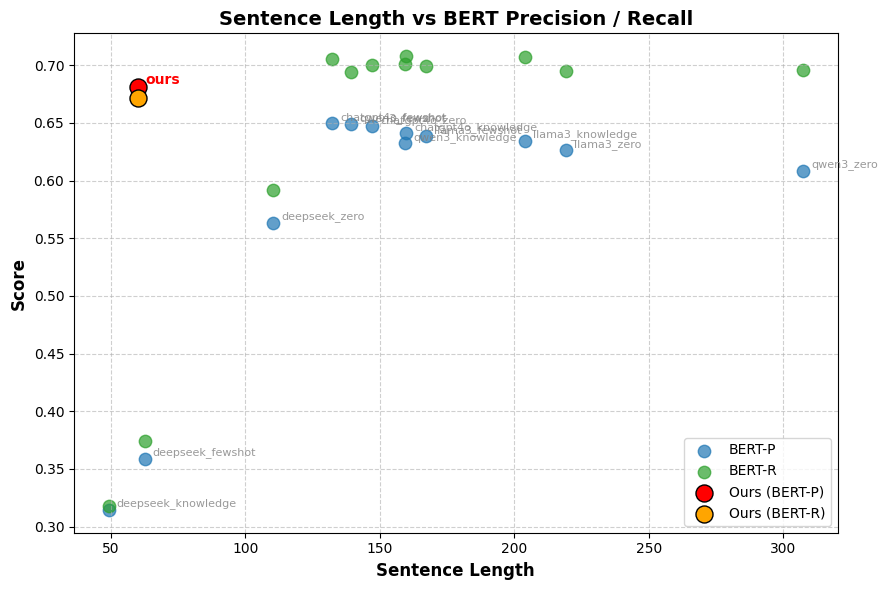

In [3]:
import matplotlib.pyplot as plt

# 模型标签
models = [
    "chatgpt4o_zero", "chatgpt4o_knowledge", "chatgpt4o_fewshot",
    "llama3_zero", "llama3_knowledge", "llama3_fewshot",
    "deepseek_zero", "deepseek_knowledge", "deepseek_fewshot",
    "qwen3_zero", "qwen3_knowledge", "qwen3_fewshot",
    "ours"
]

# 句子长度
sent_len = [147.3, 159.8, 132.4,
            219.1, 204.1, 167.2,
            110.3, 49.3, 62.7,
            307.3, 159.6, 139.4,
            60.0]

# BERT Precision
bert_p = [0.6472, 0.6410, 0.6498,
          0.6262, 0.6346, 0.6386,
          0.5636, 0.3144, 0.3586,
          0.6087, 0.6323, 0.6487,
          0.6810]

# BERT Recall
bert_r = [0.7005, 0.7080, 0.7050,
          0.6952, 0.7073, 0.6993,
          0.5917, 0.3180, 0.3739,
          0.6959, 0.7007, 0.6943,
          0.6719]

plt.figure(figsize=(9,6))

# 散点
plt.scatter(sent_len, bert_p, color='#1f77b4', s=80, alpha=0.7, label="BERT-P")
plt.scatter(sent_len, bert_r, color='#2ca02c', s=80, alpha=0.7, label="BERT-R")

# 高亮 Ours
ours_idx = models.index("ours")
plt.scatter(sent_len[ours_idx], bert_p[ours_idx], 
            edgecolor='black', facecolor='red', s=150, zorder=5, label="Ours (BERT-P)")
plt.scatter(sent_len[ours_idx], bert_r[ours_idx], 
            edgecolor='black', facecolor='orange', s=150, zorder=5, label="Ours (BERT-R)")

# 标注
for i, name in enumerate(models):
    if name == "ours":
        plt.annotate(name, (sent_len[i]+3, bert_p[i]+0.003), fontsize=10, fontweight='bold', color='red')
    else:
        plt.annotate(name, (sent_len[i]+3, bert_p[i]+0.003), fontsize=8, color='gray', alpha=0.8)

# 轴与标题
plt.xlabel("Sentence Length", fontsize=12, fontweight='bold')
plt.ylabel("Score", fontsize=12, fontweight='bold')
plt.title("Sentence Length vs BERT Precision / Recall", fontsize=14, fontweight='bold')

# 网格
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(frameon=True)
plt.tight_layout()
plt.show()


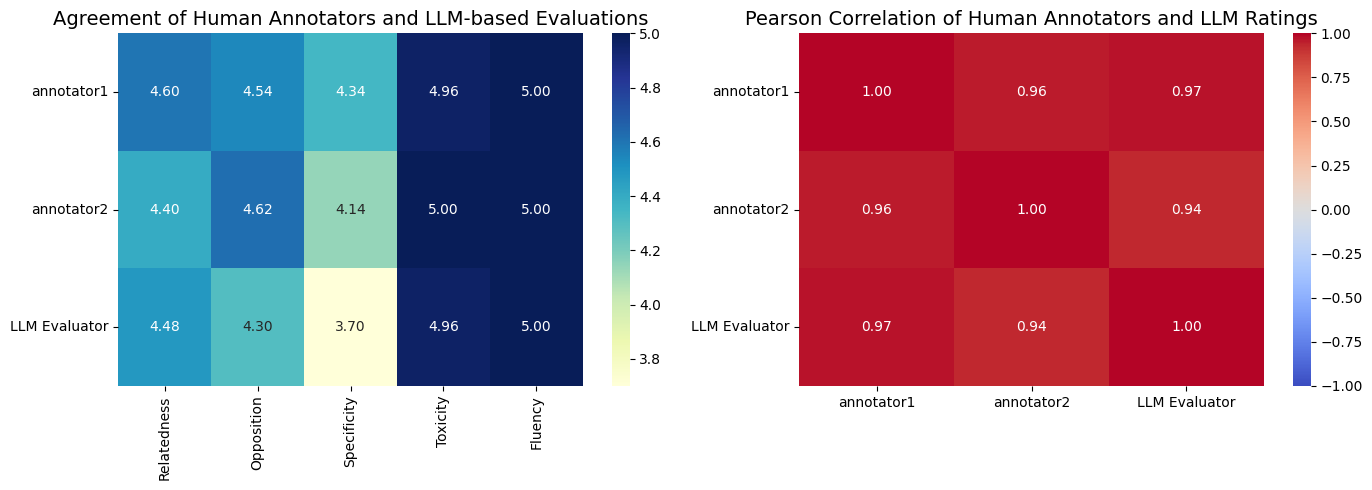

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 评分数据
data = {
    "Relatedness": [4.6, 4.4, 4.48],
    "Opposition": [4.54, 4.62, 4.3],
    "Specificity": [4.34, 4.14, 3.7],
    "Toxicity": [4.96, 5.0, 4.96],
    "Fluency": [5.0, 5.0, 5.0]
}
index = ["annotator1", "annotator2", "LLM Evaluator"]
df = pd.DataFrame(data, index=index)

# 评分者相關性矩阵
corr_matrix = df.T.corr()

# 画布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图 分数热力图
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, ax=axes[0])
axes[0].set_title("Agreement of Human Annotators and LLM-based Evaluations", fontsize=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# 右图 相关性热力图
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Pearson Correlation of Human Annotators and LLM Ratings", fontsize=14)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.tight_layout()

# 保存圖片
plt.savefig("scores_and_correlation_heatmaps.png", dpi=300)
plt.show()
